# FINAL PROJECT - SVM with Fashion MNIST dataset

Student name: Nguyễn Hồng Hạnh

Student ID: 21127503

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import gzip
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from itertools import product

### Prepare data

In [2]:
def load_mnist(path):
  train_lb_path = os.path.join(path, 'train-labels-idx1-ubyte.gz')
  train_img_path = os.path.join(path, 'train-images-idx3-ubyte.gz')
  test_lb_path = os.path.join(path, 't10k-labels-idx1-ubyte.gz')
  test_img_path = os.path.join(path, 't10k-images-idx3-ubyte.gz')

  with gzip.open(train_img_path, 'rb') as train_imgpath:
    X = np.frombuffer(train_imgpath.read(), dtype=np.uint8, offset=16)

  with gzip.open(test_img_path, 'rb') as test_imgpath:
    X_test = np.frombuffer(test_imgpath.read(), dtype=np.uint8, offset=16)

  with gzip.open(train_lb_path, 'rb') as train_lbpath:
    y = np.frombuffer(train_lbpath.read(), dtype=np.uint8, offset=8)

  with gzip.open(test_lb_path, 'rb') as test_lbpath:
    y_test = np.frombuffer(test_lbpath.read(), dtype=np.uint8, offset=8)

  X = X.reshape(len(y), 28, 28)
  X_test = X_test.reshape(len(y_test), 28, 28)

  return X, y, X_test, y_test

X_train, y_train, X_test, y_test = load_mnist('data/fashion')

print('train_X.shape =', X_train.shape)
print('train_Y.shape =', y_train.shape)
print('test_X.shape  =', X_test.shape)
print('test_Y.shape  =', y_test.shape)

train_X.shape = (60000, 28, 28)
train_Y.shape = (60000,)
test_X.shape  = (10000, 28, 28)
test_Y.shape  = (10000,)


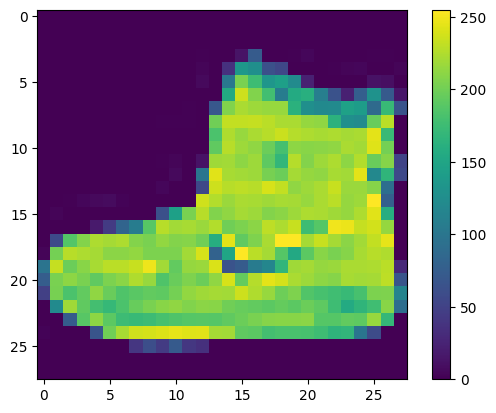

In [3]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

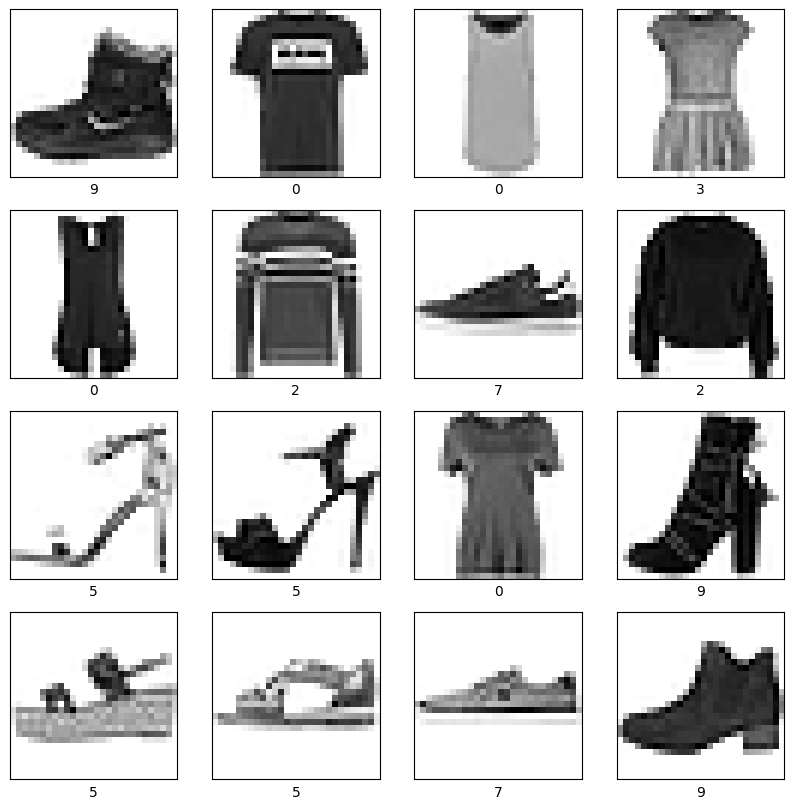

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [5]:
X_train = X_train.reshape(len(y_train), 784)
X_test = X_test.reshape(len(y_test), 784)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=0)

print('train_X.shape =', X_train.shape)
print('train_Y.shape =', y_train.shape)
print('val_X.shape =', X_val.shape)
print('val_Y.shape =', y_val.shape)

train_X.shape = (50000, 784)
train_Y.shape = (50000,)
val_X.shape = (10000, 784)
val_Y.shape = (10000,)


### Linear Kernel

In [7]:
C = [0.01, 0.05, 0.1, 0.5, 1]
train_acc = []
val_acc = []

#### c = 0.01

In [8]:
model = SVC(kernel = 'linear', C=0.01)
start = time.time()
model.fit(X_train.reshape(len(y_train), 784), y_train)
stop = time.time()
train_time = stop - start

In [9]:
train_acc.append(model.score(X_train, y_train))
val_acc.append(model.score(X_val, y_val))

print(f"Time: {train_time}")
print(f"Train acc: {train_acc[-1]}")
print(f"Val acc: {val_acc[-1]}")

Time: 239.26980590820312
Train acc: 0.8722
Val acc: 0.865


#### c = 0.05

In [10]:
model = SVC(kernel = 'linear', C=0.05)
start = time.time()
model.fit(X_train.reshape(len(y_train), 784), y_train)
stop = time.time()
train_time = stop - start

In [11]:
train_acc.append(model.score(X_train, y_train))
val_acc.append(model.score(X_val, y_val))

print(f"Time: {train_time}")
print(f"Train acc: {train_acc[-1]}")
print(f"Val acc: {val_acc[-1]}")

Time: 155.0794813632965
Train acc: 0.886
Val acc: 0.8696


#### c = 0.1

In [12]:
model = SVC(kernel = 'linear', C=0.1)
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
train_time = stop - start

In [13]:
train_acc.append(model.score(X_train, y_train))
val_acc.append(model.score(X_val, y_val))

print(f"Time: {train_time}")
print(f"Train acc: {train_acc[-1]}")
print(f"Val acc: {val_acc[-1]}")

Time: 246.02436923980713
Train acc: 0.89022
Val acc: 0.8679


#### c = 0.5

In [14]:
model = SVC(kernel = 'linear', C=0.5)
start = time.time()
model.fit(X_train.reshape(len(y_train), 784), y_train)
stop = time.time()
train_time = stop - start

In [15]:
train_acc.append(model.score(X_train, y_train))
val_acc.append(model.score(X_val, y_val))

print(f"Time: {train_time}")
print(f"Train acc: {train_acc[-1]}")
print(f"Val acc: {val_acc[-1]}")

Time: 267.7217218875885
Train acc: 0.90204
Val acc: 0.8595


#### c = 1

In [16]:
model = SVC(kernel = 'linear', C=1)
start = time.time()
model.fit(X_train, y_train)
stop = time.time()
train_time = stop - start

In [17]:
train_acc.append(model.score(X_train, y_train))
val_acc.append(model.score(X_val, y_val))

print(f"Time: {train_time}")
print(f"Train acc: {train_acc[-1]}")
print(f"Val acc: {val_acc[-1]}")

Time: 206.09995412826538
Train acc: 0.90586
Val acc: 0.8603


Text(0, 0.5, 'Accuracy')

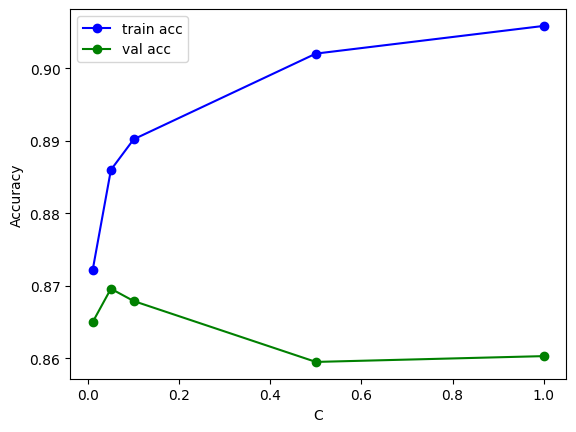

In [18]:
plt.plot(C, train_acc, color='blue', marker='o', label='train acc')
plt.plot(C, val_acc, color='green', marker='o', label='val acc')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')

### RBF kernel

In [19]:
C = [0.01, 0.05, 0.1, 0.5, 1]
Gamma = [0.001, 0.005, 0.01, 0.05, 0.1]

res = []

In [20]:
for c, g in product(C, Gamma):
    start = time.time()
    model = SVC(kernel='rbf', C=c, gamma=g).fit(X_train, y_train)
    stop = time.time()
    train_time = stop - start

    acc_train = model.score(X_train, y_train)
    acc_val = model.score(X_val, y_val)

    res.append({'C': c, 'gamma': g, 'train acc': acc_train, 'val acc': acc_val})
    
    print(f"C={c}, gamma={g} - time: {train_time}, train acc: {acc_train}, val acc: {acc_val}")

C=0.01, gamma=0.001 - time: 1414.7956829071045, train acc: 0.70786, val acc: 0.708
C=0.01, gamma=0.005 - time: 732.1676070690155, train acc: 0.76298, val acc: 0.7608
C=0.01, gamma=0.01 - time: 660.5063607692719, train acc: 0.7802, val acc: 0.779
C=0.01, gamma=0.05 - time: 1263.5315096378326, train acc: 0.74172, val acc: 0.7351
C=0.01, gamma=0.1 - time: 1970.735952615738, train acc: 0.38196, val acc: 0.371
C=0.05, gamma=0.001 - time: 649.3076829910278, train acc: 0.76846, val acc: 0.767
C=0.05, gamma=0.005 - time: 471.92005038261414, train acc: 0.81674, val acc: 0.8166
C=0.05, gamma=0.01 - time: 366.50158739089966, train acc: 0.83322, val acc: 0.831
C=0.05, gamma=0.05 - time: 982.7747282981873, train acc: 0.8357, val acc: 0.828
C=0.05, gamma=0.1 - time: 1626.6589305400848, train acc: 0.68094, val acc: 0.6558
C=0.1, gamma=0.001 - time: 546.1586065292358, train acc: 0.79092, val acc: 0.7887
C=0.1, gamma=0.005 - time: 512.918829202652, train acc: 0.83736, val acc: 0.8349
C=0.1, gamma=0.01 

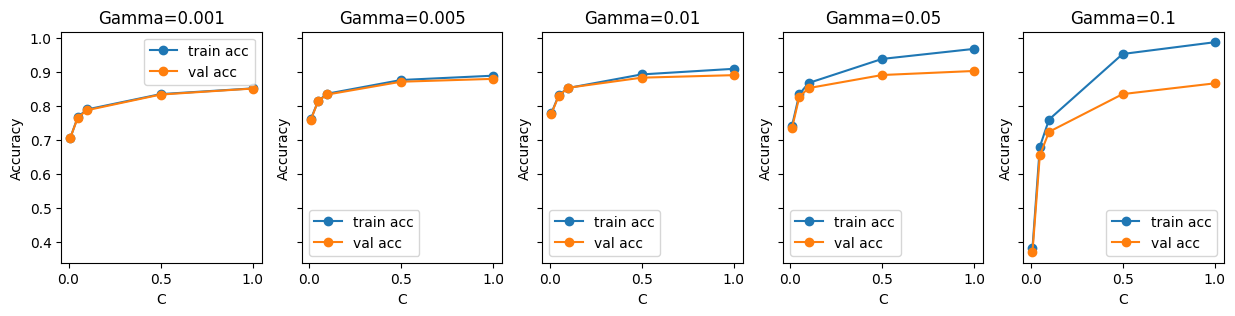

In [24]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for i, g in enumerate(Gamma):
    C = [value['C'] for value in res if value['gamma'] == g]
    train_acc = [value['train acc'] for value in res if value['gamma'] == g]
    val_acc = [value['val acc'] for value in res if value['gamma'] == g]

    axs[i].plot(C, train_acc, marker='o', label=f'train acc')
    axs[i].plot(C, val_acc, marker='o', label=f'val acc')
    axs[i].set_xlabel('C')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_title(f'Gamma={g}')
    axs[i].legend()

plt.show()

### Run the best model on the test set

#### RBF kernel with C = 1 and gamma = 0.05

In [25]:
model = SVC(kernel='rbf', C=1, gamma=0.05).fit(X_train, y_train)

y_pred = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc}")
print(metrics.classification_report(y_test, y_pred))

Test Accuracy: 0.8912
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.81      0.82      0.81      1000
           3       0.88      0.90      0.89      1000
           4       0.83      0.83      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.73      0.69      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.94      0.97      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

